FASE 1: Exploración y Limpieza

 1.1 Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
 nulos, atípicos o datos faltantes en las columnas relevantes.

In [96]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


from scipy.stats import shapiro, kstest


pd.set_option('display.max_columns', None) 


import warnings
warnings.filterwarnings("ignore")

In [97]:
df_flight = pd.read_csv(r'c:\Users\garav\OneDrive\Escritorio\bda-modulo-3-evaluacion-final-gara598\Customer Flight Activity (1) (2).csv', index_col=0)


In [98]:
df_flight.head(1)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0


In [99]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [100]:
nulos = df_flight.isnull().sum()
nulos

Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [101]:
df_loyalty = pd.read_csv(r'c:\Users\garav\OneDrive\Escritorio\bda-modulo-3-evaluacion-final-gara598\Customer Loyalty History (1) (2).csv', index_col=0)

In [102]:
df_loyalty.head()


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [103]:
df_loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [104]:
df_loyalty.dtypes

Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [105]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

1.2 Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
 presencia de valores nulos y estadísticas básicas de las columnas involucradas.

In [106]:
nulos = df_loyalty.isnull().sum()
nulos

Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [107]:
porc_nulos = (df_loyalty.isnull().sum() / df_loyalty.shape[0]) * 100
porc_nulos

Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [108]:
df_loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [110]:
print(df_loyalty.describe())

              Salary           CLV  Enrollment Year  Enrollment Month  \
count   12499.000000  16737.000000     16737.000000      16737.000000   
mean    79245.609409   7988.896536      2015.253211          6.669116   
std     35008.297285   6860.982280         1.979111          3.398958   
min    -58486.000000   1898.010000      2012.000000          1.000000   
25%     59246.500000   3980.840000      2014.000000          4.000000   
50%     73455.000000   5780.180000      2015.000000          7.000000   
75%     88517.500000   8940.580000      2017.000000         10.000000   
max    407228.000000  83325.380000      2018.000000         12.000000   

       Cancellation Year  Cancellation Month  
count        2067.000000         2067.000000  
mean         2016.503145            6.962748  
std             1.380743            3.455297  
min          2013.000000            1.000000  
25%          2016.000000            4.000000  
50%          2017.000000            7.000000  
75%          

In [111]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [112]:
df_loyalty.describe(include='object')

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


In [113]:
df_flight.isnull()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,False,False,False,False,False,False,False,False,False
100102,False,False,False,False,False,False,False,False,False
100140,False,False,False,False,False,False,False,False,False
100214,False,False,False,False,False,False,False,False,False
100272,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
999902,False,False,False,False,False,False,False,False,False
999911,False,False,False,False,False,False,False,False,False
999940,False,False,False,False,False,False,False,False,False


In [114]:
df_loyalty.isnull()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
549612,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
429460,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
608370,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
530508,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
680886,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
776187,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True


 2.1 Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
 estén completos.*(Hago primero este ejercicio porque quiero unir los DataFrame sin las columnas que no voy a usar)

In [117]:
df_loyalty_new = df_loyalty.drop(['Cancellation Year','Cancellation Year'], axis=1, inplace=True)   # elimino la columna 'Cancellation Year' y 'Cancellation Month'
                                                                                                  # porque tiene un alto porcentaje de nulos y no las voy a 
                                                                                                  # necesitar para este análisis 


In [118]:
df_loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Month'],
      dtype='object')

1.3 Une los dos conjuntos de datos de la forma más eficiente.

In [119]:
df_merged = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='left')
df_merged

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,2017,1,0,0,0,0,0.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,2017,2,3,0,3,2823,282.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,2017,3,0,0,0,0,0.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,2017,4,0,0,0,0,0.0,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,8.0,2018,8,0,0,0,0,0.0,0,0
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,8.0,2018,9,0,0,0,0,0.0,0,0
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,8.0,2018,10,0,0,0,0,0.0,0,0


2.1 Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
 estén completos.

In [120]:
df_merged['Salary']

Loyalty Number
480934    83236.0
480934    83236.0
480934    83236.0
480934    83236.0
480934    83236.0
           ...   
652627    75049.0
652627    75049.0
652627    75049.0
652627    75049.0
652627    75049.0
Name: Salary, Length: 405624, dtype: float64

In [123]:
limpieza_columna_salario = df_merged['Salary'] > 0
limpieza_columna_salario

Loyalty Number
480934    True
480934    True
480934    True
480934    True
480934    True
          ... 
652627    True
652627    True
652627    True
652627    True
652627    True
Name: Salary, Length: 405624, dtype: bool

In [128]:
limpieza_columna_salario = df_merged["Salary"] <= 0

limpieza_columna_salario = df_merged[limpieza_columna_salario]

df_merged["Salary"].min()

-58486.0

In [131]:
df_merged.sort_values(by='Salary', ascending=True)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,
152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,2018,3,14,0,14,2898,433.5,0,0
152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,2018,9,0,0,0,0,0.0,0,0
152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,2017,1,0,0,0,0,0.0,0,0
152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,2018,8,2,2,4,2032,203.0,0,0
152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,2018,7,19,2,21,4893,489.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,2018,7,4,4,8,3640,364.0,0,0
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,2018,8,6,0,6,1890,189.0,0,0
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,2018,9,0,0,0,0,0.0,0,0


In [135]:
df_merged[df_merged['Salary']  <= 0].shape[0]


480

In [136]:
print(df_merged[df_merged['Salary'] >= 0]['Salary'].describe())

count    302472.000000
mean      79451.016028
std       34713.918713
min       15609.000000
25%       59278.000000
50%       73523.000000
75%       88630.000000
max      407228.000000
Name: Salary, dtype: float64


In [147]:
mediana = df_merged[df_merged['Salary'] >= 0]['Salary'].median()
mediana

73523.0

In [148]:
def imputar_negativos(valor):
    if valor < 0:
        return mediana
    else:
        return valor

In [ ]:
df_merged['Salary'] = df_merged['Salary'].apply(imputar_negativos)
df_merged['Salary']

Loyalty Number
480934    83236.0
480934    83236.0
480934    83236.0
480934    83236.0
480934    83236.0
           ...   
652627    75049.0
652627    75049.0
652627    75049.0
652627    75049.0
652627    75049.0
Name: Salary, Length: 405624, dtype: float64

In [152]:
df_merged.sort_values(by='Salary', ascending=True)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,
290250,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,15609.0,Divorced,Nova,12208.12,2018 Promotion,2018,3,11.0,2018,12,0,0,0,0,0.0,0,0
290250,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,15609.0,Divorced,Nova,12208.12,2018 Promotion,2018,3,11.0,2017,1,0,0,0,0,0.0,0,0
290250,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,15609.0,Divorced,Nova,12208.12,2018 Promotion,2018,3,11.0,2017,2,0,0,0,0,0.0,0,0
290250,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,15609.0,Divorced,Nova,12208.12,2018 Promotion,2018,3,11.0,2017,3,0,0,0,0,0.0,0,0
290250,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,15609.0,Divorced,Nova,12208.12,2018 Promotion,2018,3,11.0,2017,4,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,2018,7,4,4,8,3640,364.0,0,0
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,2018,8,6,0,6,1890,189.0,0,0
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,2018,9,0,0,0,0,0.0,0,0


 2.2 Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
 presenten de forma coherente.

In [153]:
limpieza_columna_salario = df_merged["Salary"] <= 0

limpieza_columna_salario = df_merged[limpieza_columna_salario]

df_merged["Salary"].min()

15609.0

In [137]:
df_merged.duplicated()

Loyalty Number
480934    False
480934    False
480934    False
480934    False
480934    False
          ...  
652627    False
652627    False
652627    False
652627    False
652627    False
Length: 405624, dtype: bool

In [141]:
duplicados= df_merged.duplicated().sum()
duplicados


1864

In [142]:
def contar_duplicados(col):
    return col.duplicated().sum()

 2.3 Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
 datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [143]:
df_merged.apply(contar_duplicados)

Country                        405623
Province                       405613
City                           405595
Postal Code                    405569
Gender                         405622
Education                      405619
Salary                         399733
Marital Status                 405621
Loyalty Card                   405621
CLV                            397640
Enrollment Type                405622
Enrollment Year                405617
Enrollment Month               405612
Cancellation Month             405611
Year                           405622
Month                          405612
Flights Booked                 405602
Flights with Companions        405612
Total Flights                  405591
Distance                       400878
Points Accumulated             404075
Points Redeemed                405037
Dollar Cost Points Redeemed    405575
dtype: int64

In [145]:
for col in df_merged.columns:
    print(f"\nColumna: {col}")
    print(df_merged[col].unique())


Columna: Country
['Canada']

Columna: Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Columna: City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

Columna: Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5' 'V6V 8Z3'
 'B3J 9S2' 'M5B 3E4' 'R2C 0M5' 'S6J 3G0' 'M2P 4F6' 'P1J 8T7' 'V09 2E

In [154]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 480934 to 652627
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      405624 non-null  object 
 1   Province                     405624 non-null  object 
 2   City                         405624 non-null  object 
 3   Postal Code                  405624 non-null  object 
 4   Gender                       405624 non-null  object 
 5   Education                    405624 non-null  object 
 6   Salary                       302952 non-null  float64
 7   Marital Status               405624 non-null  object 
 8   Loyalty Card                 405624 non-null  object 
 9   CLV                          405624 non-null  float64
 10  Enrollment Type              405624 non-null  object 
 11  Enrollment Year              405624 non-null  int64  
 12  Enrollment Month             405624 non-null  int64  
 13 

In [155]:
df_merged.describe(include='all')

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624,405624,405624,405624,405624,405624,302952.000000,405624,405624,405624.000000,405624,405624.000000,405624.000000,50064.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
unique,1,11,29,55,2,5,NaN,3,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,NaN,Married,Star,NaN,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,405624,130896,81096,21984,203640,253752,NaN,235800,184224,NaN,382200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,79441.623624,NaN,NaN,7991.976226,NaN,2015.252529,6.668008,6.966443,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,NaN,NaN,NaN,NaN,NaN,NaN,34687.208508,NaN,NaN,6863.663857,NaN,1.979427,3.399766,3.448300,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,NaN,NaN,NaN,NaN,NaN,NaN,15609.000000,NaN,NaN,1898.010000,NaN,2012.000000,1.000000,1.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,59310.000000,NaN,NaN,3985.320000,NaN,2014.000000,4.000000,4.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,73523.000000,NaN,NaN,5776.340000,NaN,2015.000000,7.000000,7.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,88612.000000,NaN,NaN,8936.820000,NaN,2017.000000,10.000000,10.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000


In [156]:
df_merged.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [158]:
df_merged['Country'] = df_merged['Country'].str.lower()
df_merged['Country'] = df_merged['Country'].str.replace('.', " ")
df_merged['Province'] = df_merged['Province'].str.lower()
df_merged['Province'] = df_merged['Province'].str.replace('.', " ")
df_merged[ 'Postal Code'] = df_merged[ 'Postal Code'].str.lower()
df_merged[ 'Postal Code'] = df_merged[ 'Postal Code'].str.replace('.', " ")
df_merged['City'] = df_merged['City'].str.lower()
df_merged['City'] = df_merged['City'].str.replace('.', " ")
df_merged['Gender'] = df_merged['Gender'].str.lower()
df_merged['Gender'] = df_merged['Gender'].str.replace('.', " ")
df_merged['Education'] = df_merged['Education'].str.lower()
df_merged['Education'] = df_merged['Education'].str.replace('.', " ")
df_merged['Marital Status'] = df_merged['Marital Status'].str.lower()
df_merged['Marital Status'] = df_merged['Marital Status'].str.replace('.', " ")
df_merged['Loyalty Card'] = df_merged['Loyalty Card'].str.lower()
df_merged['Loyalty Card'] = df_merged['Loyalty Card'].str.replace('.', " ")
df_merged['Enrollment Type'] = df_merged['Enrollment Type'].str.lower()
df_merged['Enrollment Type'] = df_merged['Enrollment Type'].str.replace('.', " ")

FASE 2: VISUALIZACIÓN

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

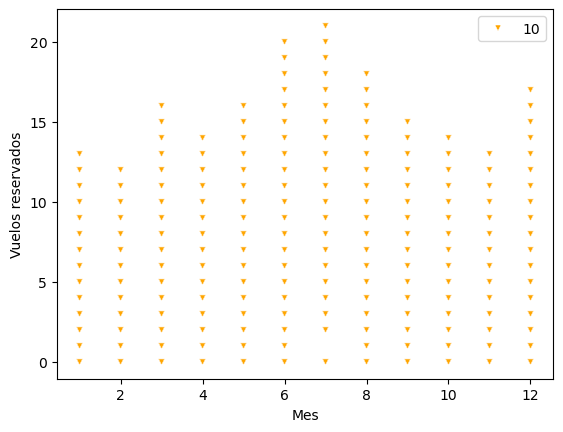

In [183]:
sns.scatterplot(x = "Month", 
                y = "Flights Booked", 
                data = df_merged, 
                size = 10, 
                marker= "v", 
                color = "orange")


plt.xlabel("Mes")
plt.ylabel("Vuelos reservados");

Los meses de con mayor cantidad de vuelos reservados por los clientes fueron junio y julio con 21 y 20 respectivamente. En cambio el mes en el que menos reservas se hicieron fue febrero con un total de 13. 

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [ ]:
#  voy a usar las columnas 'Distance' y 'Points Accumulated'

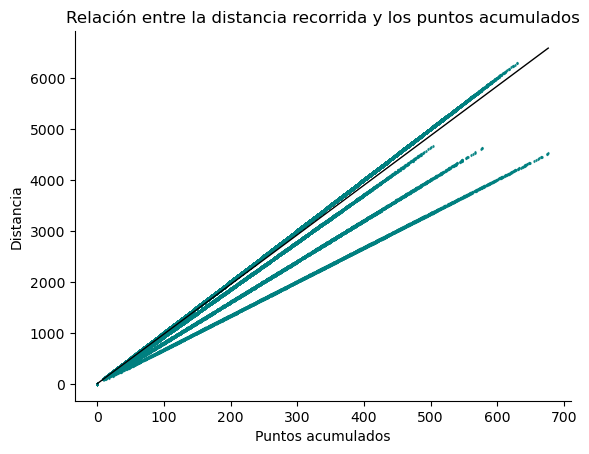

In [ ]:
sns.regplot(x = "Points Accumulated", 
            y = "Distance", 
            data = df_merged, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, 
            scatter_kws = {"color": "teal", "s": 1} 
            )


plt.xlabel("Puntos acumulados")
plt.ylabel("Distancia")


plt.title("Relación entre la distancia recorrida y los puntos acumulados")


plt.gca().spines['right'].set_visible(False) 
plt.gca().spines["top"].set_visible(False) 

Si, existe relación entre la distancia recorrida y los puntos acumulados. Entre mayor es la distancia que recorre el cliente en su vuelo, más puntos son acumulados en su programa de fidelidad, como nos indica el gráfico que según va hacia la derecha también asciende.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

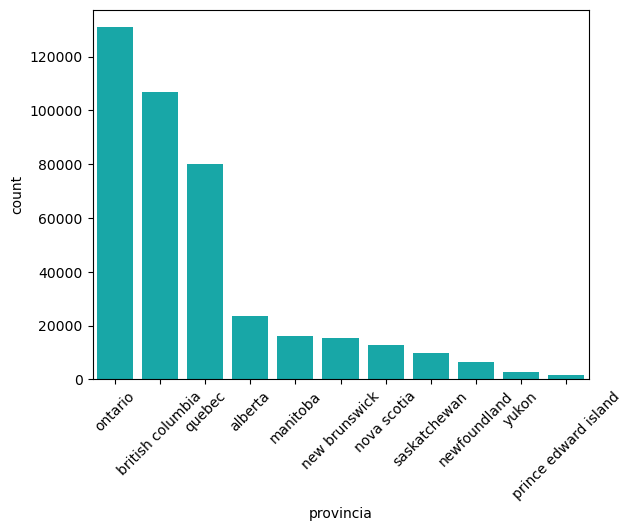

In [ ]:
orden_provincia= df_merged['Province'].value_counts().index

sns.countplot(x='Province', data=df_merged, color = 'c', order=orden_provincia)

plt.xticks(rotation=45)

plt.xlabel("provincia")

plt.show()

La mayor proporción de clientes reside en la provincia de Ontario con más de 120000 clientes, seguida de la Columbia Británica. Por el contrario vemos que la provincia que menos representación de clientes tiene es Prince Edward Island.

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [193]:
df_merged.index.duplicated().sum()

388887

In [194]:
df_merged.columns.duplicated().sum()

0

In [195]:
df_merged= df_merged.reset_index(drop=True)

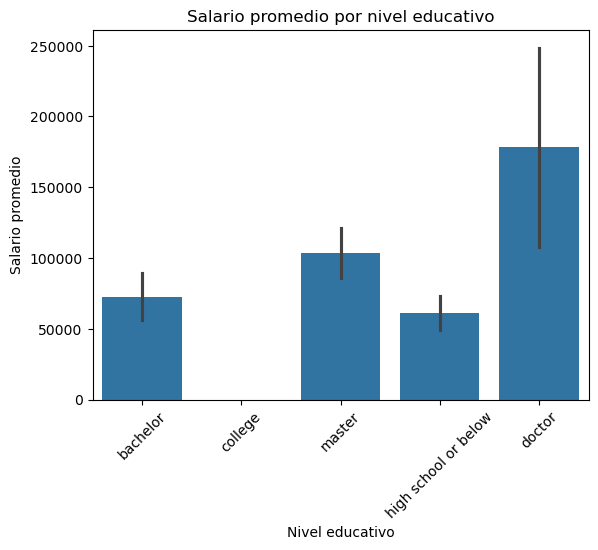

In [196]:
sns.barplot(data=df_merged, x='Education', y='Salary', estimator='mean', ci='sd')
plt.title('Salario promedio por nivel educativo')
plt.ylabel('Salario promedio')
plt.xlabel('Nivel educativo')
plt.xticks(rotation=45)
plt.show()

Podemos apreciar que los clientes doctorados tienen un mayor salario promedio, situándose en torno a unos 180000.Los que menos salario promedio perciben son los que no tienen estudios universitarios, con un salario promedio de 60000 apróximadamente.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [198]:

counts = df_merged['Loyalty Card'].value_counts()

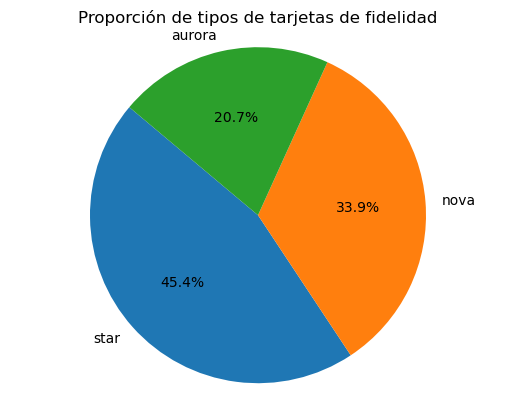

In [199]:
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Proporción de tipos de tarjetas de fidelidad')
plt.axis('equal') 
plt.show()

Algo más del 45% de los clientes están fidelizados con la tarjeta star, siendo la categoría predominante. La minoría reside en el tipo de fidelización aurora, al que pertenece solo un 20.7 % de los clientes.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

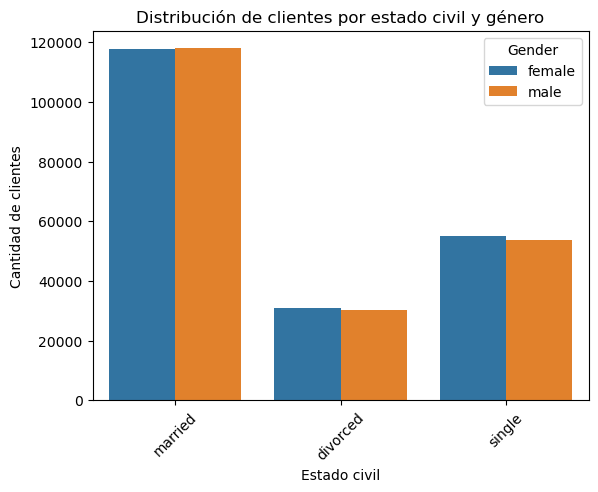

In [203]:
sns.countplot(data=df_merged, x='Marital Status', hue='Gender')
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()

Los clientes casados constituyen la mayoría, con apenas diferencia entre los géneros masculino y femenino. La minoría es representada por los divorciados, encontrando nuevamente gran similitud entre ambos géneros. Se puede concluir que unicamente en la categoría de clientes solteros se puede apreciar una ligera diferencia entre los clientes masculinos, teniendo un poco más de presencia que las mujeres de la misma categoría.

BONUS Fase 3 Preparación de Datos: 3.1 Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
 'Flights Booked' y 'Education'.

In [ ]:
df_columns = df_merged[['Flights Booked', 'Education']].copy()
df_columns

,Flights Booked,Education
0,0,bachelor
1,3,bachelor
2,0,bachelor
3,0,bachelor
4,6,bachelor
...,...,...
405619,0,bachelor
405620,0,bachelor
405621,0,bachelor
405622,0,bachelor


In [206]:
print(df_columns.isnull().sum())

Flights Booked    0
Education         0
dtype: int64


In [209]:
print(df_columns.dtypes)

Flights Booked     int64
Education         object
dtype: object


 3.2 Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
 básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada
 grupo.

In [246]:
resultado = df_columns.groupby('Education')["Flights Booked"].agg(["mean", "median", "std", "var","count"])
resultado

,mean,median,std,var,count
Education,,,,,
bachelor,4.091093,1.0,5.216995,27.217041,253752
college,4.153012,1.0,5.242136,27.479991,102672
doctor,4.146281,1.0,5.250093,27.563479,17856
high school or below,4.155777,1.0,5.234551,27.400523,19008
master,4.184014,1.0,5.210294,27.147166,12336


3.3 Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
 significativa en el número de vuelos reservados entre los diferentes niveles educativos.

primero averiguo el tamaño de la muestra para saber que tipo de prueba tengo que hacer (si Shapiro-Wilk o Kolmogorov-Smirnov)

In [215]:
n = len(df_columns)
print(n)

405624


In [217]:
col = df_columns['Flights Booked']
print("Media:", col.mean())
print("Varianza:", col.var())

Media: 4.115052363765457
Varianza: 27.30604215323732


In [224]:
df_columns['Education'].unique()

array(['bachelor', 'college', 'master', 'high school or below', 'doctor'],
      dtype=object)

In [225]:
def clasificar_educacion(valor):
    if valor in ['Bachelor', 'Master', 'doctor']:
        return 'Alto nivel educativo'
    else:
        return 'Bajo nivel educativo'

df_columns['Education_Nivel'] = df_columns['Education'].apply(clasificar_educacion)

In [226]:
print(df_columns['Education_Nivel'].value_counts())

Education_Nivel
Bajo nivel educativo    387768
Alto nivel educativo     17856
Name: count, dtype: int64


In [227]:
df_columns.groupby('Education_Nivel')['Flights Booked'].mean()

Education_Nivel
Alto nivel educativo    4.146281
Bajo nivel educativo    4.113614
Name: Flights Booked, dtype: float64

In [242]:
Alto_nivel_educativo = df_columns[df_columns['Education_Nivel']=='Alto nivel educativo']['Flights Booked']
Bajo_nivel_educativo = df_columns[df_columns['Education_Nivel']=='Bajo nivel educativo']['Flights Booked']

In [245]:
print(df_columns['Education_Nivel'].unique())

['Bajo nivel educativo' 'Alto nivel educativo']


In [243]:
print(len(Alto_nivel_educativo))
print(len(Bajo_nivel_educativo))

17856
387768


In [234]:

from scipy.stats import levene, bartlett, shapiro
import scipy.stats as st

In [244]:
_, p_value = st.ttest_ind(Alto_nivel_educativo,Bajo_nivel_educativo,equal_var=False)
print(p_value)

0.4161616205893631


H0 = Hipóteis nula: no existen diferencias significativas en reservas de vuelos respecto al nivel educativo de los individuos de la muestra
H1 = Hipótesis alternativa : existen diferencias significativas en reservas de vuelos respecto al nivel educativo de los individuos de la muestra

In [ ]:
# nivel significancia = 5% -> alpha = 0.05

La p_value nos da un resultado de 0.41 que es notablemente superior al nivel de significancia (alpha) por lo que NO tengo razones objetivas para rechazar la hipótesis nula, concluyo que no existe diferencias significativas entre la cantidad de vuelos reservados por ambos grupos testeados